In [7]:
%matplotlib widget
from pixell import enmap, enplot
import numpy as np

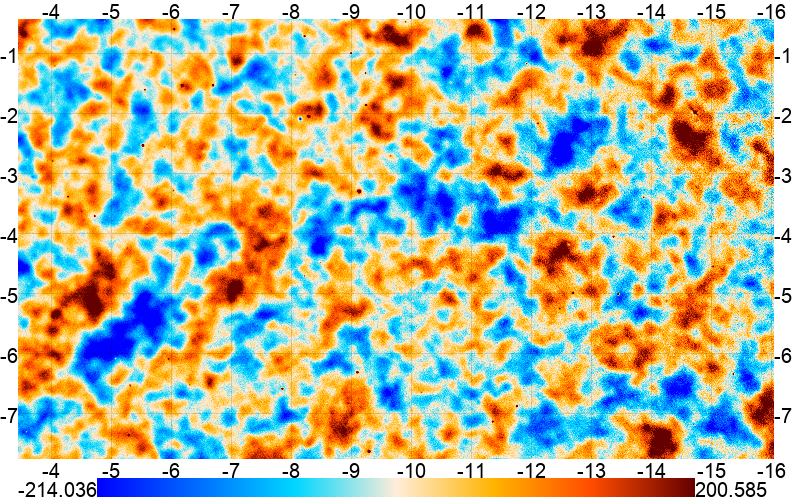

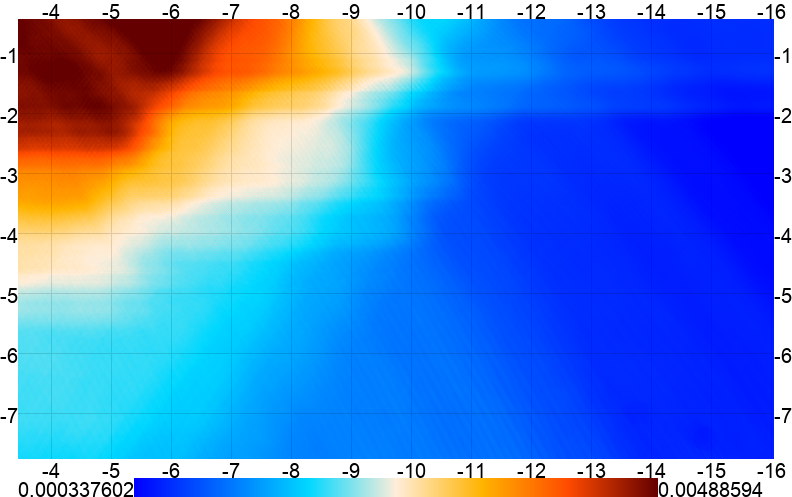

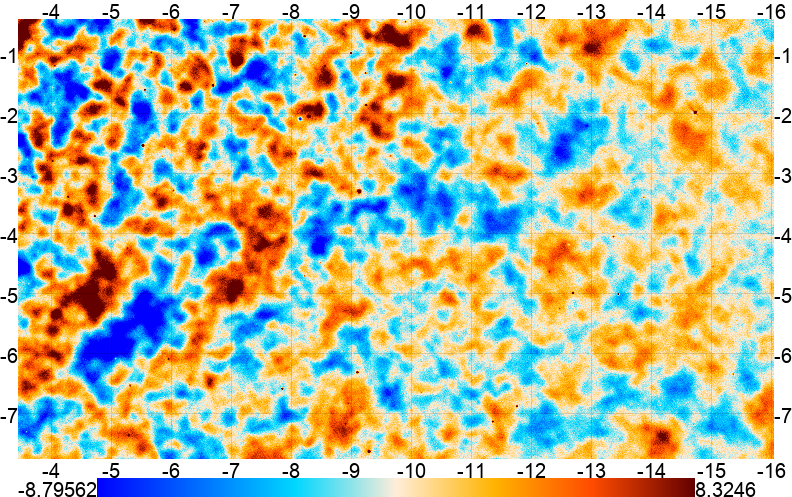

In [10]:
# 读入 Signal map 和 ivar map
signal_map = enmap.read_map("maps/f150_1_10_8_map.fits")
ivar_map   = enmap.read_map("maps/f150_1_10_8_ivar.fits")

# 计算 RMS 噪声: sigma = 1 / sqrt(ivar)，避免除0
rms_map = np.zeros_like(ivar_map)
mask_positive = ivar_map > 0
rms_map[mask_positive] = 1 / np.sqrt(ivar_map[mask_positive])
rms_map[~mask_positive] = np.nan  # 处理非法值

# 计算 SNR map
snr_map = np.zeros_like(signal_map)
snr_map[mask_positive] = signal_map[mask_positive] * np.sqrt(ivar_map[mask_positive])
snr_map[~mask_positive] = np.nan

# 画图
enplot.pshow(
    signal_map,
    downgrade=2,
    colorbar=True
)

enplot.pshow(
    ivar_map,
    downgrade=2,
    colorbar=True
)

enplot.pshow(
    snr_map,
    downgrade=2,
    colorbar=True
)
